In [1569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1570]:
path= r'E:/kaggle/latest_projects/stock_market/dn.csv'

In [1571]:
df = pd.read_csv(path)

# Checking the data

In [1572]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-29,18.490000,18.490000,17.620001,17.730000,15.058702,23140.0
1,2010-09-30,17.415001,18.299999,17.415001,17.959999,15.254049,10580.0
2,2010-10-01,17.615000,18.000000,17.615000,17.805000,15.122401,2360.0
3,2010-10-04,19.000000,19.900000,17.889999,17.985001,15.275281,4800.0
4,2010-10-05,19.000000,19.000000,17.150000,18.045000,15.326241,10350.0


In [1573]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2753,2021-11-23,2129.000000,2168.500000,2052.000000,2152.649902,2152.649902,1234236.0
2754,2021-11-24,2173.000000,2187.000000,2140.000000,2155.149902,2155.149902,559363.0
2755,2021-11-25,2164.800049,2176.949951,2115.100098,2159.500000,2159.500000,699420.0
2756,2021-11-26,2120.000000,2182.050049,2082.149902,2105.600098,2105.600098,872720.0
2757,2021-11-29,2063.000000,2105.000000,2005.000000,2086.449951,2086.449951,995794.0


In [1574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2758 non-null   object 
 1   Open       2749 non-null   float64
 2   High       2749 non-null   float64
 3   Low        2749 non-null   float64
 4   Close      2749 non-null   float64
 5   Adj Close  2749 non-null   float64
 6   Volume     2749 non-null   float64
dtypes: float64(6), object(1)
memory usage: 151.0+ KB


In [1575]:
df["Date"] = pd.to_datetime(df["Date"])

In [1576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2758 non-null   datetime64[ns]
 1   Open       2749 non-null   float64       
 2   High       2749 non-null   float64       
 3   Low        2749 non-null   float64       
 4   Close      2749 non-null   float64       
 5   Adj Close  2749 non-null   float64       
 6   Volume     2749 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.0 KB


In [1577]:
#removing close column
df.drop(["Close"],axis=1,inplace=True)

In [1578]:
#renaming adj close as close
df.rename(columns={"Adj Close":"Close"},inplace=True)

In [1579]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [1580]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2749.0,292.659229,512.945810,13.900000,26.715000,86.800003,270.100006,2.921000e+03
High,2749.0,298.814234,522.908132,14.400000,27.000000,88.699997,274.649994,3.020000e+03
Low,2749.0,286.774867,503.185409,13.630000,26.500000,84.800003,265.000000,2.877000e+03
Close,2749.0,289.485732,513.100749,12.039678,24.394863,81.855927,264.782349,2.925900e+03
Volume,2749.0,311432.841397,618566.110432,0.000000,11777.000000,70813.000000,314959.000000,7.372732e+06


### Observations

The available data is from SEPT 2010 to NOV 2021. 

There are total 7 columns.

The low of stock during this period is 13.63 and high is 3020. 3020/13.63 = 221 times the money in 11 years :)

The mean is very high compared to median so t data is rightly skewed.

There are few null values which should be removed.

Volume is having big values.

# There are many technical/logical tools  which can be used to add useful information to the dataframe

The tools which will be used are: 

Relative strength index(RSI) - Represents bull/bear strength

Moving average convergence divergence (MACD) - Represents bullish/bearish momentum

Moving average - Shows short and long term support, also indicates trend

%change in close price - Shows us the recent momentum

Year - Useful for stock direction in long run

Month of year - Useful for stock direction in short run

Money flow index(MFI) - Represents bull/bear momentum

Ichimoku cloud - Full fledged tool for trading - gives long term and short term trend with strength of trend

Exponential moving average - Shows short and long term support, also indicates trend but recent data is given more importance

Change in volume for past 3 days - Volume activity represent entry and exit of big fish

Open/Close 1 day ago - useful for identifying strenght between bull and bear

High/Low 1 day ago - Useful for identifying volatility

# Checking for null values and removing them

In [1581]:
df.shape

(2758, 6)

In [1582]:
df.isnull().sum()

Date      0
Open      9
High      9
Low       9
Close     9
Volume    9
dtype: int64

In [1583]:
df.dropna(inplace=True)

In [1584]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [1585]:
df.shape

(2749, 6)

In [1586]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day


In [1587]:
df.head()

,Date,Open,High,Low,Close,Volume,Month,Year,Day
0,2010-09-29,18.490000,18.490000,17.620001,15.058702,23140.0,9,2010,29
1,2010-09-30,17.415001,18.299999,17.415001,15.254049,10580.0,9,2010,30
2,2010-10-01,17.615000,18.000000,17.615000,15.122401,2360.0,10,2010,1
3,2010-10-04,19.000000,19.900000,17.889999,15.275281,4800.0,10,2010,4
4,2010-10-05,19.000000,19.000000,17.150000,15.326241,10350.0,10,2010,5


In [1588]:
df.drop(["Date"],axis=1,inplace=True)

In [1589]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day
0,18.490000,18.490000,17.620001,15.058702,23140.0,9,2010,29
1,17.415001,18.299999,17.415001,15.254049,10580.0,9,2010,30
2,17.615000,18.000000,17.615000,15.122401,2360.0,10,2010,1
3,19.000000,19.900000,17.889999,15.275281,4800.0,10,2010,4
4,19.000000,19.000000,17.150000,15.326241,10350.0,10,2010,5


# Everything is now numeric

# Moving average

In [1590]:
df["Ma_5"]= df["Close"].rolling(5).mean()
df["Ma_25"]= df["Close"].rolling(25).mean()
df["Ma_50"]= df["Close"].rolling(50).mean()
df["Ma_100"]= df["Close"].rolling(100).mean()
df["Ma_200"]= df["Close"].rolling(200).mean()

# Moving average exponential

In [1591]:
df["Ema_5"] = df["Close"].ewm(span=5,adjust=False).mean()
df["Ema_25"] = df["Close"].ewm(span=25,adjust=False).mean()
df["Ema_50"] = df["Close"].ewm(span=50,adjust=False).mean()
df["Ema_100"] = df["Close"].ewm(span=100,adjust=False).mean()
df["Ema_200"] = df["Close"].ewm(span=200,adjust=False).mean()

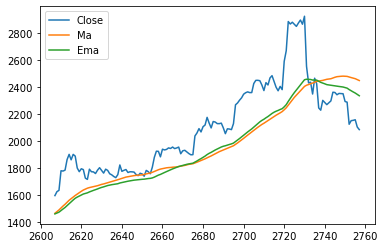

In [1592]:
plt.plot(df["Close"].tail(150),label="Close")
plt.plot(df["Ma_50"].tail(150),label="Ma")
plt.plot(df["Ema_50"].tail(150),label="Ema")
plt.legend(loc=2)

# MFI (Money flow index)
## Need to create a test df for creating this column

In [1593]:
test_df = pd.DataFrame()

test_df["typ_price"]= (df["Low"]+df["High"]+df["Close"])/3
test_df["money_flow"] = test_df["typ_price"]*df["Volume"]
test_df["positive_flow"] = 0
test_df["negative_flow"] = 0

test_df["typ_price_shifted"] = test_df["typ_price"].shift(-1)

In [1594]:
test_df.head()

,typ_price,money_flow,positive_flow,negative_flow,typ_price_shifted
0,17.056234,394681.262473,0,0,16.989683
1,16.989683,179750.846140,0,0,16.912467
2,16.912467,39913.422120,0,0,17.688427
3,17.688427,84904.448000,0,0,17.158747
4,17.158747,177593.031450,0,0,17.338269


In [1595]:
test_df["positive_flow"] = np.where((test_df["typ_price"]>test_df["typ_price_shifted"]),test_df["money_flow"],0)
test_df["negative_flow"] = np.where((test_df["typ_price"]<test_df["typ_price_shifted"]),test_df["money_flow"],0)

In [1596]:
test_df["positive_flow_avg_14"] = test_df["positive_flow"].rolling(14).mean()
test_df["negative_flow_avg_14"] = test_df["negative_flow"].rolling(14).mean()

In [1597]:
test_df.head(20)

,typ_price,money_flow,positive_flow,negative_flow,typ_price_shifted,positive_flow_avg_14,negative_flow_avg_14
0,17.056234,394681.262473,394681.262473,0.000000,16.989683,NaN,NaN
1,16.989683,179750.846140,179750.846140,0.000000,16.912467,NaN,NaN
2,16.912467,39913.422120,0.000000,39913.422120,17.688427,NaN,NaN
3,17.688427,84904.448000,84904.448000,0.000000,17.158747,NaN,NaN
4,17.158747,177593.031450,0.000000,177593.031450,17.338269,NaN,NaN
5,17.338269,216381.601280,216381.601280,0.000000,17.224934,NaN,NaN
6,17.224934,40823.092790,40823.092790,0.000000,17.177584,NaN,NaN
7,17.177584,22330.859200,0.000000,22330.859200,17.425486,NaN,NaN
8,17.425486,73535.549513,73535.549513,0.000000,17.285964,NaN,NaN
9,17.285964,4321.491000,0.000000,4321.491000,17.442584,NaN,NaN


In [1598]:
test_df["money_ratio"] = test_df["positive_flow_avg_14"]/test_df["negative_flow_avg_14"]

In [1599]:
test_df["Mfi"] = 100-(100/(1+test_df["money_ratio"]))

In [1600]:
test_df["Mfi"].describe()

count    2736.000000
mean       48.898421
std        20.915291
min         0.050979
25%        34.060473
50%        48.837456
75%        63.891533
max        98.720997
Name: Mfi, dtype: float64

In [1601]:
df["MFI"]= test_df["Mfi"] 

In [1602]:
df["MFI_above_80"] = np.where((df["MFI"]>80),1,0)
df["MFI_below_20"] = np.where((df["MFI"]<20),1,0)

In [1603]:
df.head(20)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_5,Ma_25,...,Ma_100,Ma_200,Ema_5,Ema_25,Ema_50,Ema_100,Ema_200,MFI,MFI_above_80,MFI_below_20
0,18.490000,18.490000,17.620001,15.058702,23140.0,9,2010,29,NaN,NaN,...,NaN,NaN,15.058702,15.058702,15.058702,15.058702,15.058702,NaN,0,0
1,17.415001,18.299999,17.415001,15.254049,10580.0,9,2010,30,NaN,NaN,...,NaN,NaN,15.123818,15.073729,15.066363,15.062570,15.060646,NaN,0,0
2,17.615000,18.000000,17.615000,15.122401,2360.0,10,2010,1,NaN,NaN,...,NaN,NaN,15.123345,15.077473,15.068560,15.063755,15.061260,NaN,0,0
3,19.000000,19.900000,17.889999,15.275281,4800.0,10,2010,4,NaN,NaN,...,NaN,NaN,15.173991,15.092689,15.076667,15.067944,15.063390,NaN,0,0
4,19.000000,19.000000,17.150000,15.326241,10350.0,10,2010,5,15.207335,NaN,...,NaN,NaN,15.224741,15.110654,15.086454,15.073058,15.066005,NaN,0,0
5,18.600000,18.600000,17.855000,15.559808,12480.0,10,2010,6,15.307556,NaN,...,NaN,NaN,15.336430,15.145205,15.105017,15.082697,15.070919,NaN,0,0
6,18.320000,18.475000,17.950001,15.249800,2370.0,10,2010,7,15.306706,NaN,...,NaN,NaN,15.307553,15.153250,15.110695,15.086006,15.072699,NaN,0,0
7,17.504999,18.400000,17.504999,15.627753,1300.0,10,2010,8,15.407777,NaN,...,NaN,NaN,15.414286,15.189751,15.130972,15.096734,15.078222,NaN,0,0
8,18.400000,18.475000,18.110001,15.691456,4220.0,10,2010,11,15.491012,NaN,...,NaN,NaN,15.506676,15.228343,15.152951,15.108510,15.084323,NaN,0,0
9,18.200001,18.200001,18.200001,15.457890,250.0,10,2010,12,15.517341,NaN,...,NaN,NaN,15.490414,15.246001,15.164910,15.115429,15.088040,NaN,0,0


# RSI

In [1604]:
test_df = pd.DataFrame()
test_df["Close"]=df["Close"]
test_df["Close_shifted"] = df["Close"].shift(-1)
test_df.head()

,Close,Close_shifted
0,15.058702,15.254049
1,15.254049,15.122401
2,15.122401,15.275281
3,15.275281,15.326241
4,15.326241,15.559808


In [1605]:
test_df["up_move"] = np.where(test_df["Close_shifted"]>test_df["Close"],(test_df["Close_shifted"]-test_df["Close"]),0)
test_df["down_move"] = np.where(test_df["Close_shifted"]<test_df["Close"],(test_df["Close"]-test_df["Close_shifted"]),0)

In [1606]:
test_df.head(10)

,Close,Close_shifted,up_move,down_move
0,15.058702,15.254049,0.195347,0.000000
1,15.254049,15.122401,0.000000,0.131648
2,15.122401,15.275281,0.152880,0.000000
3,15.275281,15.326241,0.050960,0.000000
4,15.326241,15.559808,0.233567,0.000000
5,15.559808,15.249800,0.000000,0.310008
6,15.249800,15.627753,0.377953,0.000000
7,15.627753,15.691456,0.063703,0.000000
8,15.691456,15.457890,0.000000,0.233566
9,15.457890,15.627753,0.169863,0.000000


In [1607]:
test_df["upmove_14"] = test_df["up_move"].rolling(14).mean()
test_df["downmove_14"] = test_df["down_move"].rolling(14).mean()
test_df["RS"] = test_df["upmove_14"]/test_df["downmove_14"] 
test_df["RSI"] = 100-(100/(1+test_df["RS"]))

In [1608]:
test_df["RSI"].describe()

count    2736.000000
mean       54.566477
std        17.516018
min         3.067475
25%        43.034131
50%        54.309880
75%        66.666632
max        99.849411
Name: RSI, dtype: float64

In [1609]:
df["RSI"] = test_df["RSI"]
df["RSI_above_60"] = np.where(df["RSI"]>60,1,0)
df["RSI_below_40"] = np.where(df["RSI"]<60,1,0)

# MACD (Moving average convergence/divergence)

In [1610]:
test_df = pd.DataFrame()
test_df["Ema_12"] = df["Close"].ewm(span=12,adjust=False).mean()
test_df["Ema_26"] = df["Close"].ewm(span=26,adjust=False).mean()
test_df["MACD"]= test_df["Ema_12"]-test_df["Ema_26"]
test_df.tail()

,Ema_12,Ema_26,MACD
2753,2286.359305,2363.802531,-77.443225
2754,2266.173243,2348.346780,-82.173537
2755,2249.761975,2334.358130,-84.596155
2756,2227.583225,2317.413090,-89.829866
2757,2205.870413,2300.304710,-94.434296


In [1611]:
test_df["MACD_signal"] = test_df["MACD"].ewm(span=9,adjust=False).mean()
test_df["MACD_above_MACDsignal"] = np.where(test_df["MACD"]>test_df["MACD_signal"],1,0)

In [1612]:
test_df.tail(10)

,Ema_12,Ema_26,MACD,MACD_signal,MACD_above_MACDsignal
2748,2367.324545,2424.574427,-57.249883,-50.555487,0
2749,2364.997684,2419.213355,-54.215671,-51.287523,0
2750,2354.144187,2409.971621,-55.827435,-52.195506,0
2751,2344.237389,2401.066316,-56.828927,-53.122190,0
2752,2310.670106,2380.694741,-70.024635,-56.502679,0
2753,2286.359305,2363.802531,-77.443225,-60.690788,0
2754,2266.173243,2348.346780,-82.173537,-64.987338,0
2755,2249.761975,2334.358130,-84.596155,-68.909101,0
2756,2227.583225,2317.413090,-89.829866,-73.093254,0
2757,2205.870413,2300.304710,-94.434296,-77.361463,0


In [1613]:
df["MACD"] = test_df["MACD"]
df["MACD_signal"] = test_df["MACD_signal"]
df["MACD_above_MACDsignal"] = test_df["MACD_above_MACDsignal"]

In [1614]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_5,Ma_25,...,Ema_200,MFI,MFI_above_80,MFI_below_20,RSI,RSI_above_60,RSI_below_40,MACD,MACD_signal,MACD_above_MACDsignal
0,18.490000,18.490000,17.620001,15.058702,23140.0,9,2010,29,NaN,NaN,...,15.058702,NaN,0,0,NaN,0,0,0.000000,0.000000,0
1,17.415001,18.299999,17.415001,15.254049,10580.0,9,2010,30,NaN,NaN,...,15.060646,NaN,0,0,NaN,0,0,0.015583,0.003117,1
2,17.615000,18.000000,17.615000,15.122401,2360.0,10,2010,1,NaN,NaN,...,15.061260,NaN,0,0,NaN,0,0,0.017113,0.005916,1
3,19.000000,19.900000,17.889999,15.275281,4800.0,10,2010,4,NaN,NaN,...,15.063390,NaN,0,0,NaN,0,0,0.030312,0.010795,1
4,19.000000,19.000000,17.150000,15.326241,10350.0,10,2010,5,15.207335,NaN,...,15.066005,NaN,0,0,NaN,0,0,0.044373,0.017511,1


# change in close

In [1615]:
df["Close_change_1_day"] = (df["Close"].shift(-1))/df["Close"]
df["Close_change_2_day"] = (df["Close"].shift(-2))/df["Close"]
df["Close_change_3_day"] = (df["Close"].shift(-3))/df["Close"]
df["Close_change_5_day"] = (df["Close"].shift(-5))/df["Close"]
df["Close_change_10_day"] = (df["Close"].shift(-10))/df["Close"]

# change in volume

In [1616]:
df["volume_change_1_day"] =(df["Volume"].shift(-1))/df["Volume"]
df["volume_change_2_day"] =(df["Volume"].shift(-2))/df["Volume"]
df["volume_change_3_day"] =(df["Volume"].shift(-3))/df["Volume"]

# volatiliy and bull/bear indicator

In [1617]:
df["open/close"] = df["Open"]/df["Close"]
df["High/low"] = df["High"]/df["Low"]

# ichimoku cloud

In [1618]:
test_df = pd.DataFrame()

test_df["9_ph"] = df["High"].rolling(9).max()
test_df["9_pl"] = df["Low"].rolling(9).min()
test_df["26_ph"] = df["High"].rolling(26).max()
test_df["26_pl"] = df["Low"].rolling(26).min()
test_df["52_ph"] = df["High"].rolling(52).max()
test_df["52_pl"] = df["Low"].rolling(52).min()

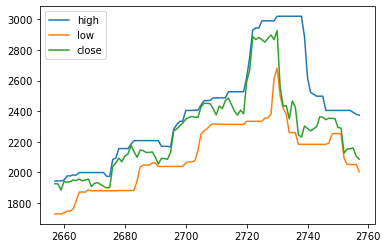

In [1619]:
plt.plot(test_df["9_ph"].tail(100),label="high")
plt.plot(test_df["9_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

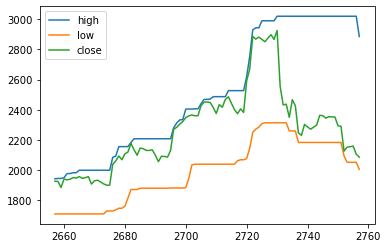

In [1620]:
plt.plot(test_df["26_ph"].tail(100),label="high")
plt.plot(test_df["26_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

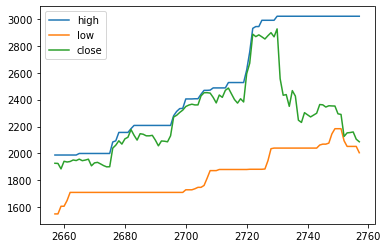

In [1621]:
plt.plot(test_df["52_ph"].tail(100),label="high")
plt.plot(test_df["52_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

In [1622]:
test_df["tenkan_sen"] = (test_df["9_ph"]+test_df["9_pl"])/2
test_df["kijun_sen"] = (test_df["26_ph"]+test_df["26_pl"])/2
test_df["senkou_A"] = (test_df["tenkan_sen"] +test_df["kijun_sen"])/2
test_df["senkou_B"] = (test_df["52_ph"]+test_df["52_pl"])/2
test_df["chikou"] = df["Close"].shift(26)

df["tenkan_sen"] =test_df["tenkan_sen"] 
df["kijun_sen"]=test_df["kijun_sen"]
df["senkou_A"]=test_df["senkou_A"]
df["senkou_B"]=test_df["senkou_B"]
df["chikou"]=test_df["chikou"]

In [1623]:
df["tenkan_above_kijun"] = np.where(df["tenkan_sen"]>df["kijun_sen"],1,0)
df["kijun_above_senkou_A"] =np.where(df["kijun_sen"]>df["senkou_A"],1,0)
df["tenken_above_senkou_A"] =np.where(df["tenkan_sen"]>df["senkou_A"],1,0)
df["kijun_above_senkou_B"] =np.where(df["kijun_sen"]>df["senkou_B"],1,0)
df["tenken_above_senkou_B"] =np.where(df["tenkan_sen"]>df["senkou_B"],1,0)
df["senkou_A_above_B"] = np.where(df["senkou_A"]>df["senkou_B"],1,0)
df["close_above_chikou"] = np.where(df["Close"]>df["chikou"],1,0)

In [1624]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_5,Ma_25,...,senkou_A,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou
0,18.490000,18.490000,17.620001,15.058702,23140.0,9,2010,29,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,17.415001,18.299999,17.415001,15.254049,10580.0,9,2010,30,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,17.615000,18.000000,17.615000,15.122401,2360.0,10,2010,1,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,19.000000,19.900000,17.889999,15.275281,4800.0,10,2010,4,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,19.000000,19.000000,17.150000,15.326241,10350.0,10,2010,5,15.207335,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [1625]:
df.shape

(2749, 49)

In [1626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 2757
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2749 non-null   float64
 1   High                   2749 non-null   float64
 2   Low                    2749 non-null   float64
 3   Close                  2749 non-null   float64
 4   Volume                 2749 non-null   float64
 5   Month                  2749 non-null   int64  
 6   Year                   2749 non-null   int64  
 7   Day                    2749 non-null   int64  
 8   Ma_5                   2745 non-null   float64
 9   Ma_25                  2725 non-null   float64
 10  Ma_50                  2700 non-null   float64
 11  Ma_100                 2650 non-null   float64
 12  Ma_200                 2550 non-null   float64
 13  Ema_5                  2749 non-null   float64
 14  Ema_25                 2749 non-null   float64
 15  Ema_

In [1627]:
df["Target"] = df["Close"].shift(-7)

In [1628]:
df.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Month                      0
Year                       0
Day                        0
Ma_5                       4
Ma_25                     24
Ma_50                     49
Ma_100                    99
Ma_200                   199
Ema_5                      0
Ema_25                     0
Ema_50                     0
Ema_100                    0
Ema_200                    0
MFI                       13
MFI_above_80               0
MFI_below_20               0
RSI                       13
RSI_above_60               0
RSI_below_40               0
MACD                       0
MACD_signal                0
MACD_above_MACDsignal      0
Close_change_1_day         1
Close_change_2_day         2
Close_change_3_day         3
Close_change_5_day         5
Close_change_10_day       10
volume_change_1_day       25
volume_change_2_day       27
volume_change_

In [1629]:
df.dropna(inplace=True)

In [1630]:
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Month                    0
Year                     0
Day                      0
Ma_5                     0
Ma_25                    0
Ma_50                    0
Ma_100                   0
Ma_200                   0
Ema_5                    0
Ema_25                   0
Ema_50                   0
Ema_100                  0
Ema_200                  0
MFI                      0
MFI_above_80             0
MFI_below_20             0
RSI                      0
RSI_above_60             0
RSI_below_40             0
MACD                     0
MACD_signal              0
MACD_above_MACDsignal    0
Close_change_1_day       0
Close_change_2_day       0
Close_change_3_day       0
Close_change_5_day       0
Close_change_10_day      0
volume_change_1_day      0
volume_change_2_day      0
volume_change_3_day      0
open/close               0
High/low                 0
t

# Let's check for correlation

In [1631]:
correlation = df.corr()
correlation

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_5,Ma_25,...,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Target
Open,1.000000,0.999738,0.999746,0.999532,0.583592,0.041902,0.681183,-0.014681,0.999585,0.996385,...,0.995428,0.991592,0.155709,-0.162460,0.155709,0.226532,0.235895,0.230826,0.144388,0.994562
High,0.999738,1.000000,0.999649,0.999814,0.593072,0.041110,0.682048,-0.015277,0.999393,0.996031,...,0.995092,0.991097,0.156239,-0.163232,0.156239,0.226759,0.236354,0.231254,0.145509,0.994686
Low,0.999746,0.999649,1.000000,0.999772,0.580011,0.042137,0.680387,-0.015250,0.999367,0.996219,...,0.995286,0.991602,0.156018,-0.161949,0.156018,0.226184,0.235839,0.230669,0.145154,0.994926
Close,0.999532,0.999814,0.999772,1.000000,0.588134,0.041686,0.680734,-0.015297,0.999256,0.996064,...,0.995103,0.991242,0.155993,-0.162638,0.155993,0.226574,0.235869,0.230747,0.145944,0.995229
Volume,0.583592,0.593072,0.580011,0.588134,1.000000,0.010757,0.548901,-0.006193,0.579831,0.570892,...,0.572559,0.564458,0.159158,-0.172844,0.159158,0.184903,0.228637,0.221907,0.169888,0.581649
Month,0.041902,0.041110,0.042137,0.041686,0.010757,1.000000,-0.092056,0.011870,0.042971,0.049303,...,0.053520,0.054514,-0.009311,0.030781,-0.009311,0.007332,0.004632,0.002932,-0.021634,0.037065
Year,0.681183,0.682048,0.680387,0.680734,0.548901,-0.092056,1.000000,-0.021191,0.680489,0.680324,...,0.682974,0.683105,0.142679,-0.156293,0.142679,0.165558,0.226636,0.217977,0.121180,0.683278
Day,-0.014681,-0.015277,-0.015250,-0.015297,-0.006193,0.011870,-0.021191,1.000000,-0.013097,-0.009867,...,-0.011344,-0.009908,-0.000875,0.000290,-0.000875,-0.041642,-0.014146,-0.015857,-0.018910,-0.007196
Ma_5,0.999585,0.999393,0.999367,0.999256,0.579831,0.042971,0.680489,-0.013097,1.000000,0.997293,...,0.996205,0.992563,0.153683,-0.161367,0.153683,0.226065,0.235333,0.230253,0.141663,0.994346
Ma_25,0.996385,0.996031,0.996219,0.996064,0.570892,0.049303,0.680324,-0.009867,0.997293,1.000000,...,0.998824,0.997152,0.130704,-0.140953,0.130704,0.221371,0.221996,0.218231,0.121880,0.992498


In [1632]:
correlation["Target"].sort_values(ascending=False)

Target                   1.000000
Close                    0.995229
Low                      0.994926
Ema_5                    0.994764
High                     0.994686
Open                     0.994562
Ma_5                     0.994346
tenkan_sen               0.994315
Ema_25                   0.993537
senkou_A                 0.993535
Ema_50                   0.992549
Ma_25                    0.992498
kijun_sen                0.992003
Ma_50                    0.991298
Ema_100                  0.991248
senkou_B                 0.990826
Ma_100                   0.989833
Ema_200                  0.989207
chikou                   0.988151
Ma_200                   0.986488
MACD_signal              0.787820
MACD                     0.714249
Year                     0.683278
Volume                   0.581649
tenken_above_senkou_B    0.236810
senkou_A_above_B         0.231826
kijun_above_senkou_B     0.225344
tenken_above_senkou_A    0.155377
tenkan_above_kijun       0.155377
close_above_ch

<AxesSubplot:>

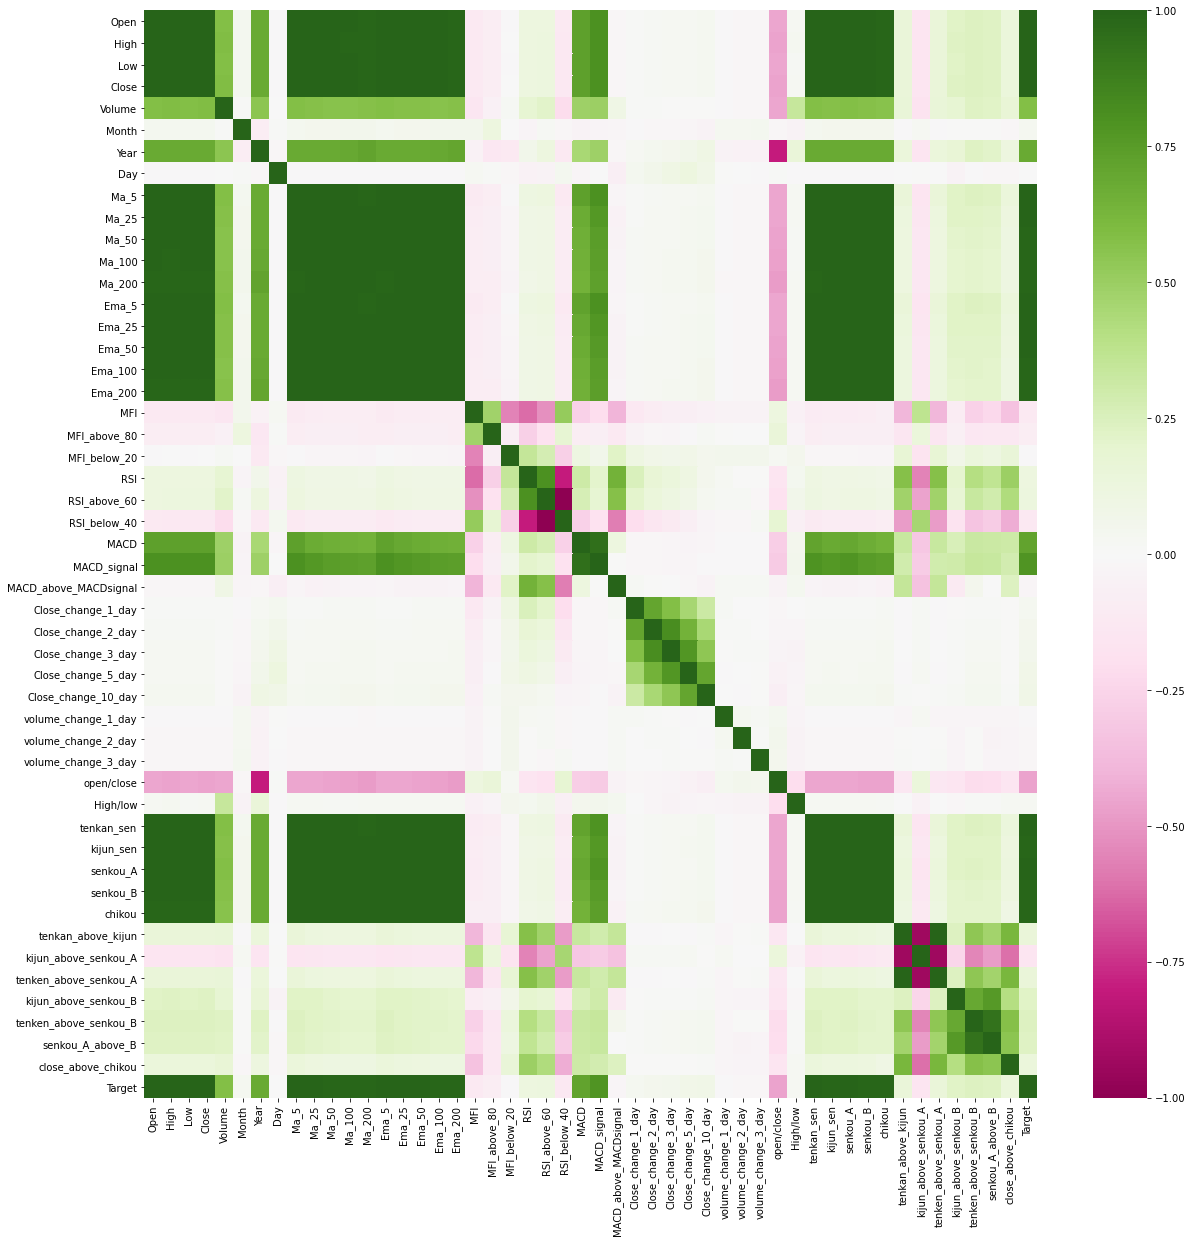

In [1633]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap="PiYG")

## There are many highly correlated columns now in the dataset so there is too much 
## multi-colinearity, hence we need to remove unnecessary columns

In [1634]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

df.dropna(inplace=True)

In [1635]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns.drop("Target")
  
training_df_vif = df.drop("Target",axis=1)

In [1636]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(training_df_vif.values, i)
                          for i in range(len(training_df_vif.columns))]
  
print(vif_data)

                  feature           VIF
0                    Open  1.241031e+04
1                    High  1.067607e+04
2                     Low  7.587923e+03
3                   Close  2.727109e+04
4                  Volume  3.479236e+00
5                   Month  1.291721e+00
6                    Year  1.612890e+01
7                     Day  1.052486e+00
8                    Ma_5  5.688590e+04
9                   Ma_25  5.739259e+04
10                  Ma_50  5.459498e+04
11                 Ma_100  4.471701e+04
12                 Ma_200  3.777969e+04
13                  Ema_5  2.048549e+06
14                 Ema_25  4.783813e+06
15                 Ema_50  3.662134e+06
16                Ema_100  1.320846e+06
17                Ema_200  2.555531e+04
18                    MFI  2.899748e+00
19           MFI_above_80  1.505121e+00
20           MFI_below_20  1.695126e+00
21                    RSI  5.711996e+00
22           RSI_above_60  3.039139e+06
23           RSI_below_40  4.545570e+06


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [1637]:
filt = vif_data["VIF"]<=7
imp_data = vif_data.loc[filt]
imp_data.sort_values(by="VIF")

,feature,VIF
32,volume_change_1_day,1.014645
34,volume_change_3_day,1.028423
33,volume_change_2_day,1.028762
7,Day,1.052486
5,Month,1.291721
36,High/low,1.494349
19,MFI_above_80,1.505121
20,MFI_below_20,1.695126
31,Close_change_10_day,2.139124
48,close_above_chikou,2.230266


In [1638]:
 df[imp_data.feature].head()

,Volume,Month,Day,MFI,MFI_above_80,MFI_below_20,RSI,MACD_above_MACDsignal,Close_change_1_day,Close_change_2_day,Close_change_3_day,Close_change_5_day,Close_change_10_day,volume_change_1_day,volume_change_2_day,volume_change_3_day,open/close,High/low,kijun_above_senkou_B,close_above_chikou
199,3040.0,7,15,1.602387,0,1,79.519593,1,1.021438,1.061960,1.102483,1.119738,1.134624,2.585526,8.503289,196.822368,1.197400,1.034575,0,1
200,7860.0,7,18,1.379821,0,1,76.419198,1,1.039672,1.079345,1.111339,1.159713,1.111074,3.288804,76.124682,3.540712,1.171667,1.014249,0,1
201,25850.0,7,19,1.116716,0,1,80.737219,1,1.038159,1.068932,1.054407,1.107874,1.068677,23.146615,1.076596,1.007737,1.084059,1.101604,0,1
202,598340.0,7,20,0.096871,0,1,83.212446,1,1.029642,1.015651,1.074461,1.038653,1.012833,0.046512,0.043537,0.082060,1.089444,1.101486,0,1
203,27830.0,7,21,0.092875,0,1,77.563480,1,0.986412,1.043528,1.036431,0.977288,0.947006,0.936040,1.764283,0.391304,1.138887,1.063155,0,1


In [1639]:
final_df =  df[imp_data.feature]

In [1640]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 199 to 2747
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 2471 non-null   float64
 1   Month                  2471 non-null   int64  
 2   Day                    2471 non-null   int64  
 3   MFI                    2471 non-null   float64
 4   MFI_above_80           2471 non-null   int32  
 5   MFI_below_20           2471 non-null   int32  
 6   RSI                    2471 non-null   float64
 7   MACD_above_MACDsignal  2471 non-null   int32  
 8   Close_change_1_day     2471 non-null   float64
 9   Close_change_2_day     2471 non-null   float64
 10  Close_change_3_day     2471 non-null   float64
 11  Close_change_5_day     2471 non-null   float64
 12  Close_change_10_day    2471 non-null   float64
 13  volume_change_1_day    2471 non-null   float64
 14  volume_change_2_day    2471 non-null   float64
 15  vo

In [1641]:
final_df["Target"] = df["Target"]

<ipython-input-1641-df137540b570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Target"] = df["Target"]


In [1642]:
correlation = final_df.corr()

In [1643]:
correlation["Target"].sort_values(ascending=False)

Target                   1.000000
Volume                   0.579916
kijun_above_senkou_B     0.226036
close_above_chikou       0.146020
RSI                      0.120795
Close_change_10_day      0.081484
Close_change_5_day       0.076019
Close_change_3_day       0.061745
Close_change_2_day       0.050776
Month                    0.039859
Close_change_1_day       0.034957
High/low                 0.015003
MFI_below_20            -0.005985
Day                     -0.008407
volume_change_1_day     -0.014440
volume_change_3_day     -0.016741
volume_change_2_day     -0.018827
MACD_above_MACDsignal   -0.026387
MFI_above_80            -0.089447
MFI                     -0.119825
open/close              -0.455940
Name: Target, dtype: float64

<AxesSubplot:>

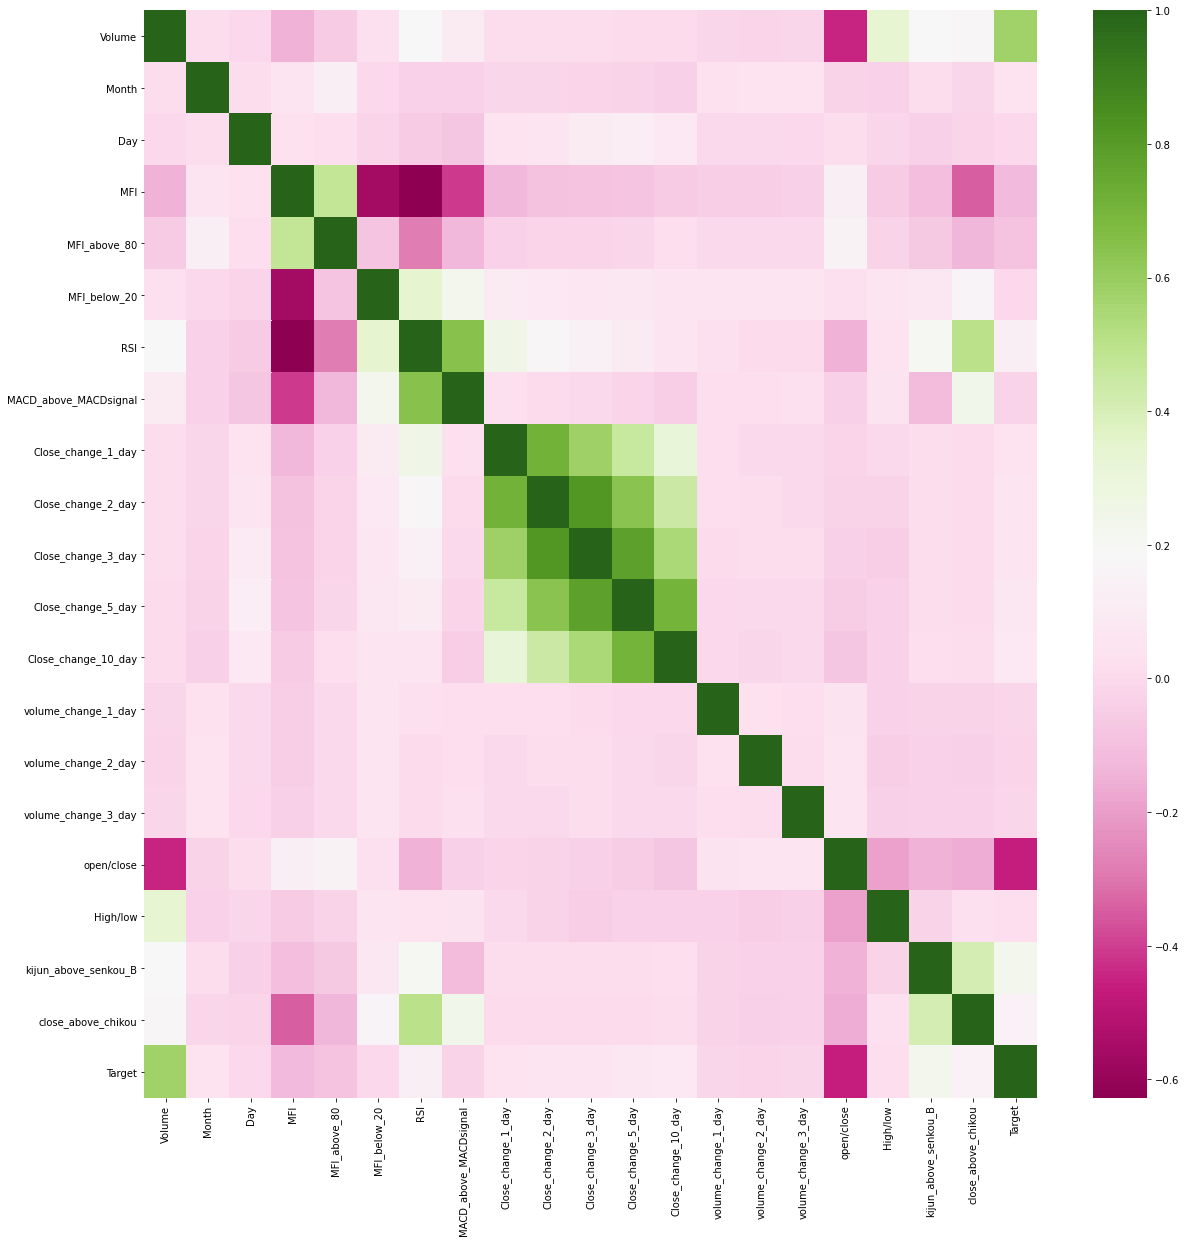

In [1644]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap="PiYG")

<AxesSubplot:xlabel='Target', ylabel='Count'>

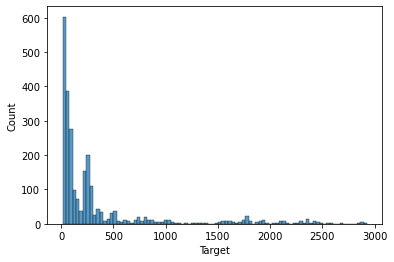

In [1645]:
sns.histplot(final_df["Target"])

# As the target is rightly skewed let's log transform it to make it more or less
# like normal distribution

In [1646]:
final_df["Target"] = np.log(final_df["Target"])

<ipython-input-1646-2ab214f240e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Target"] = np.log(final_df["Target"])


<AxesSubplot:xlabel='Target', ylabel='Count'>

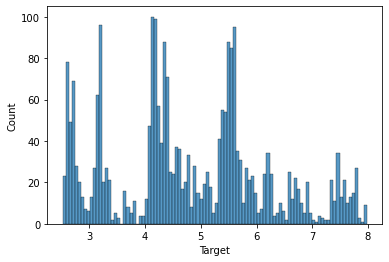

In [1647]:
sns.histplot(final_df["Target"],bins=100)

# Now we need to scale the data
## But before scaling we need to set aside boolean columns from other columns

In [1648]:
final_df.columns

Index(['Volume', 'Month', 'Day', 'MFI', 'MFI_above_80', 'MFI_below_20', 'RSI',
       'MACD_above_MACDsignal', 'Close_change_1_day', 'Close_change_2_day',
       'Close_change_3_day', 'Close_change_5_day', 'Close_change_10_day',
       'volume_change_1_day', 'volume_change_2_day', 'volume_change_3_day',
       'open/close', 'High/low', 'kijun_above_senkou_B', 'close_above_chikou',
       'Target'],
      dtype='object')

In [1649]:
final_df_regular_column  = final_df[['Volume', 'Month', 'Day', 'MFI', 'RSI',
        'Close_change_1_day', 'Close_change_2_day',
       'Close_change_3_day', 'Close_change_5_day', 'Close_change_10_day',
       'volume_change_1_day', 'volume_change_2_day', 'volume_change_3_day',
       'open/close', 'High/low']]

In [1650]:
final_df_regular_column.head()

,Volume,Month,Day,MFI,RSI,Close_change_1_day,Close_change_2_day,Close_change_3_day,Close_change_5_day,Close_change_10_day,volume_change_1_day,volume_change_2_day,volume_change_3_day,open/close,High/low
199,3040.0,7,15,1.602387,79.519593,1.021438,1.061960,1.102483,1.119738,1.134624,2.585526,8.503289,196.822368,1.197400,1.034575
200,7860.0,7,18,1.379821,76.419198,1.039672,1.079345,1.111339,1.159713,1.111074,3.288804,76.124682,3.540712,1.171667,1.014249
201,25850.0,7,19,1.116716,80.737219,1.038159,1.068932,1.054407,1.107874,1.068677,23.146615,1.076596,1.007737,1.084059,1.101604
202,598340.0,7,20,0.096871,83.212446,1.029642,1.015651,1.074461,1.038653,1.012833,0.046512,0.043537,0.082060,1.089444,1.101486
203,27830.0,7,21,0.092875,77.563480,0.986412,1.043528,1.036431,0.977288,0.947006,0.936040,1.764283,0.391304,1.138887,1.063155


In [1651]:
final_df_boolean_column = final_df[['MFI_above_80', 'MFI_below_20','MACD_above_MACDsignal',  
                                    'kijun_above_senkou_B', 'close_above_chikou' ]]

In [1652]:
final_df_boolean_column.head()

,MFI_above_80,MFI_below_20,MACD_above_MACDsignal,kijun_above_senkou_B,close_above_chikou
199,0,1,1,0,1
200,0,1,1,0,1
201,0,1,1,0,1
202,0,1,1,0,1
203,0,1,1,0,1


In [1653]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1654]:
final_df_scaled = pd.DataFrame(scaler.fit_transform(final_df_regular_column),columns=final_df_regular_column.columns)

In [1655]:
final_df_scaled.head()

,Volume,Month,Day,MFI,RSI,Close_change_1_day,Close_change_2_day,Close_change_3_day,Close_change_5_day,Close_change_10_day,volume_change_1_day,volume_change_2_day,volume_change_3_day,open/close,High/low
0,-0.527545,0.133379,-0.096393,-2.287160,1.377642,0.733378,1.538092,2.082740,1.792290,1.281979,-0.021902,0.002728,0.466580,2.924910,-0.238521
1,-0.520037,0.133379,0.245995,-2.298076,1.202591,1.435416,2.004979,2.275903,2.455279,1.011002,-0.020083,0.344710,-0.024184,2.419039,-0.922313
2,-0.492017,0.133379,0.360124,-2.310981,1.446390,1.377148,1.725327,1.034062,1.595519,0.523171,0.031265,-0.034831,-0.030616,0.696842,2.016466
3,0.399662,0.133379,0.474254,-2.361002,1.586144,1.049254,0.294385,1.471487,0.447480,-0.119391,-0.028467,-0.040056,-0.032966,0.802695,2.012503
4,-0.488933,0.133379,0.588383,-2.361198,1.267198,-0.615134,1.043072,0.641952,-0.570276,-0.876821,-0.026167,-0.031353,-0.032181,1.774653,0.722983


In [1656]:
Training_df = pd.concat([final_df_scaled.reset_index(),final_df_boolean_column.reset_index()],axis=1)

In [1657]:
Training_df.head()

,index,Volume,Month,Day,MFI,RSI,Close_change_1_day,Close_change_2_day,Close_change_3_day,Close_change_5_day,...,volume_change_2_day,volume_change_3_day,open/close,High/low,index,MFI_above_80,MFI_below_20,MACD_above_MACDsignal,kijun_above_senkou_B,close_above_chikou
0,0,-0.527545,0.133379,-0.096393,-2.287160,1.377642,0.733378,1.538092,2.082740,1.792290,...,0.002728,0.466580,2.924910,-0.238521,199,0,1,1,0,1
1,1,-0.520037,0.133379,0.245995,-2.298076,1.202591,1.435416,2.004979,2.275903,2.455279,...,0.344710,-0.024184,2.419039,-0.922313,200,0,1,1,0,1
2,2,-0.492017,0.133379,0.360124,-2.310981,1.446390,1.377148,1.725327,1.034062,1.595519,...,-0.034831,-0.030616,0.696842,2.016466,201,0,1,1,0,1
3,3,0.399662,0.133379,0.474254,-2.361002,1.586144,1.049254,0.294385,1.471487,0.447480,...,-0.040056,-0.032966,0.802695,2.012503,202,0,1,1,0,1
4,4,-0.488933,0.133379,0.588383,-2.361198,1.267198,-0.615134,1.043072,0.641952,-0.570276,...,-0.031353,-0.032181,1.774653,0.722983,203,0,1,1,0,1


In [1658]:
Training_df.isnull().sum()

index                    0
Volume                   0
Month                    0
Day                      0
MFI                      0
RSI                      0
Close_change_1_day       0
Close_change_2_day       0
Close_change_3_day       0
Close_change_5_day       0
Close_change_10_day      0
volume_change_1_day      0
volume_change_2_day      0
volume_change_3_day      0
open/close               0
High/low                 0
index                    0
MFI_above_80             0
MFI_below_20             0
MACD_above_MACDsignal    0
kijun_above_senkou_B     0
close_above_chikou       0
dtype: int64

In [1659]:
Training_df["Target"] = final_df["Target"].reset_index().drop("index",axis=1)

In [1660]:
Training_df.drop(["index"],axis=1,inplace=True)

In [1661]:
Training_df.columns

Index(['Volume', 'Month', 'Day', 'MFI', 'RSI', 'Close_change_1_day',
       'Close_change_2_day', 'Close_change_3_day', 'Close_change_5_day',
       'Close_change_10_day', 'volume_change_1_day', 'volume_change_2_day',
       'volume_change_3_day', 'open/close', 'High/low', 'MFI_above_80',
       'MFI_below_20', 'MACD_above_MACDsignal', 'kijun_above_senkou_B',
       'close_above_chikou', 'Target'],
      dtype='object')

In [1662]:
X = Training_df.drop(["Target"],axis=1)
Y = Training_df["Target"]

In [1663]:
X.head()

,Volume,Month,Day,MFI,RSI,Close_change_1_day,Close_change_2_day,Close_change_3_day,Close_change_5_day,Close_change_10_day,volume_change_1_day,volume_change_2_day,volume_change_3_day,open/close,High/low,MFI_above_80,MFI_below_20,MACD_above_MACDsignal,kijun_above_senkou_B,close_above_chikou
0,-0.527545,0.133379,-0.096393,-2.287160,1.377642,0.733378,1.538092,2.082740,1.792290,1.281979,-0.021902,0.002728,0.466580,2.924910,-0.238521,0,1,1,0,1
1,-0.520037,0.133379,0.245995,-2.298076,1.202591,1.435416,2.004979,2.275903,2.455279,1.011002,-0.020083,0.344710,-0.024184,2.419039,-0.922313,0,1,1,0,1
2,-0.492017,0.133379,0.360124,-2.310981,1.446390,1.377148,1.725327,1.034062,1.595519,0.523171,0.031265,-0.034831,-0.030616,0.696842,2.016466,0,1,1,0,1
3,0.399662,0.133379,0.474254,-2.361002,1.586144,1.049254,0.294385,1.471487,0.447480,-0.119391,-0.028467,-0.040056,-0.032966,0.802695,2.012503,0,1,1,0,1
4,-0.488933,0.133379,0.588383,-2.361198,1.267198,-0.615134,1.043072,0.641952,-0.570276,-0.876821,-0.026167,-0.031353,-0.032181,1.774653,0.722983,0,1,1,0,1


In [1664]:
Y.head()

0    2.950254
1    2.923184
2    2.891497
3    2.913996
4    2.914233
Name: Target, dtype: float64

In [1665]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=2022)

In [1666]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1729, 20)
(1729,)
(742, 20)
(742,)


# Linear regression

In [1667]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()

In [1668]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [1669]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Training performance

In [1670]:
prediction = lin_reg.predict(xtrain)
print("MAE")
print(mean_absolute_error(ytrain,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytrain,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytrain,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytrain,prediction))

MAE
0.5891718625311774
 
MSE
0.5771222437490856
 
RMSE
0.7596856216548301
 
r2 score
0.6972117676485561


# Testing performance

In [1671]:
prediction = lin_reg.predict(xtest)
print("MAE")
print(mean_absolute_error(ytest,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytest,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytest,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytest,prediction))

MAE
0.6194023188069686
 
MSE
0.6556055179108135
 
RMSE
0.8096947066091105
 
r2 score
0.6751014745570418


# Testing performance and training performance both are poor hence model is 
#  underfitting the data

# First trying ridge regression

In [1672]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)

In [1673]:
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.5)

# Training performance

In [1674]:
prediction = ridge.predict(xtrain)
print("MAE")
print(mean_absolute_error(ytrain,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytrain,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytrain,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytrain,prediction))

MAE
0.5891907163803871
 
MSE
0.577122532105591
 
RMSE
0.7596858114415399
 
r2 score
0.6972116163617923


# Testing performance

In [1675]:
prediction = ridge.predict(xtest)
print("MAE")
print(mean_absolute_error(ytest,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytest,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytest,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytest,prediction))

MAE
0.6194109394167994
 
MSE
0.6554553877678785
 
RMSE
0.8096019934312653
 
r2 score
0.675175874574631


# Lasso regression

In [1676]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.1)

In [1677]:
Lasso.fit(xtrain,ytrain)

Lasso(alpha=0.1)

# Training

In [1678]:
prediction = Lasso.predict(xtrain)
print("MAE")
print(mean_absolute_error(ytrain,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytrain,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytrain,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytrain,prediction))

MAE
0.6199848130997364
 
MSE
0.6324666997292087
 
RMSE
0.7952777500529036
 
r2 score
0.6681751983979703


# Testing

In [1679]:
prediction = Lasso.predict(xtest)
print("MAE")
print(mean_absolute_error(ytest,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytest,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytest,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytest,prediction))

MAE
0.6597060821887597
 
MSE
0.7330573584557342
 
RMSE
0.8561876888017803
 
r2 score
0.6367186542505918


#  let's use a complex model

# Random forest

In [1680]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=2000, max_depth=30, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=2022, verbose=2, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [1681]:
forest.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s


building tree 1 of 2000building tree 2 of 2000

building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000building tree 11 of 2000
building tree 12 of 2000

building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000building tree 26 of 2000

building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.7s


building tree 193 of 2000
building tree 194 of 2000
building tree 195 of 2000building tree 196 of 2000
building tree 197 of 2000

building tree 198 of 2000building tree 199 of 2000

building tree 200 of 2000
building tree 201 of 2000
building tree 202 of 2000
building tree 203 of 2000
building tree 204 of 2000
building tree 205 of 2000
building tree 206 of 2000building tree 207 of 2000

building tree 208 of 2000
building tree 209 of 2000
building tree 210 of 2000building tree 211 of 2000

building tree 212 of 2000building tree 213 of 2000

building tree 214 of 2000building tree 215 of 2000

building tree 216 of 2000
building tree 217 of 2000
building tree 218 of 2000
building tree 219 of 2000building tree 220 of 2000building tree 221 of 2000building tree 222 of 2000



building tree 223 of 2000
building tree 224 of 2000
building tree 225 of 2000
building tree 226 of 2000building tree 227 of 2000
building tree 228 of 2000

building tree 229 of 2000building tree 230 of 2000

building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    1.7s



building tree 389 of 2000building tree 390 of 2000

building tree 391 of 2000
building tree 392 of 2000
building tree 393 of 2000
building tree 394 of 2000building tree 395 of 2000
building tree 396 of 2000

building tree 397 of 2000building tree 398 of 2000building tree 399 of 2000

building tree 400 of 2000

building tree 401 of 2000
building tree 402 of 2000
building tree 403 of 2000building tree 404 of 2000

building tree 405 of 2000
building tree 406 of 2000building tree 407 of 2000

building tree 408 of 2000
building tree 409 of 2000
building tree 410 of 2000building tree 411 of 2000
building tree 412 of 2000
building tree 413 of 2000building tree 414 of 2000

building tree 415 of 2000

building tree 416 of 2000
building tree 417 of 2000
building tree 418 of 2000
building tree 419 of 2000
building tree 420 of 2000building tree 421 of 2000

building tree 422 of 2000building tree 423 of 2000
building tree 424 of 2000

building tree 425 of 2000
building tree 426 of 2000
building tr

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    3.1s


building tree 660 of 2000
building tree 661 of 2000building tree 662 of 2000

building tree 663 of 2000
building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000building tree 670 of 2000

building tree 671 of 2000building tree 672 of 2000
building tree 673 of 2000

building tree 674 of 2000
building tree 675 of 2000
building tree 676 of 2000building tree 677 of 2000

building tree 678 of 2000building tree 679 of 2000

building tree 680 of 2000building tree 681 of 2000building tree 682 of 2000


building tree 683 of 2000building tree 684 of 2000

building tree 685 of 2000
building tree 686 of 2000
building tree 687 of 2000building tree 688 of 2000building tree 689 of 2000


building tree 690 of 2000
building tree 691 of 2000
building tree 692 of 2000
building tree 693 of 2000
building tree 694 of 2000building tree 695 of 2000

building tree 696 of 2000building tree 697 of 2000

building tre

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:    5.2s


building tree 1007 of 2000
building tree 1008 of 2000building tree 1009 of 2000
building tree 1010 of 2000building tree 1011 of 2000building tree 1012 of 2000



building tree 1013 of 2000
building tree 1014 of 2000
building tree 1015 of 2000
building tree 1016 of 2000
building tree 1017 of 2000
building tree 1018 of 2000building tree 1019 of 2000building tree 1020 of 2000
building tree 1021 of 2000


building tree 1022 of 2000
building tree 1023 of 2000
building tree 1024 of 2000
building tree 1025 of 2000building tree 1026 of 2000building tree 1027 of 2000

building tree 1028 of 2000building tree 1029 of 2000


building tree 1030 of 2000
building tree 1031 of 2000
building tree 1032 of 2000building tree 1033 of 2000

building tree 1034 of 2000
building tree 1035 of 2000building tree 1036 of 2000building tree 1037 of 2000


building tree 1038 of 2000
building tree 1039 of 2000
building tree 1040 of 2000building tree 1041 of 2000building tree 1042 of 2000


building tree 1043 of 2000bu

building tree 1330 of 2000
building tree 1331 of 2000
building tree 1332 of 2000
building tree 1333 of 2000building tree 1334 of 2000

building tree 1335 of 2000building tree 1336 of 2000

building tree 1337 of 2000
building tree 1338 of 2000
building tree 1339 of 2000
building tree 1340 of 2000
building tree 1341 of 2000
building tree 1342 of 2000
building tree 1343 of 2000
building tree 1344 of 2000
building tree 1345 of 2000
building tree 1346 of 2000
building tree 1347 of 2000
building tree 1348 of 2000building tree 1349 of 2000

building tree 1350 of 2000
building tree 1351 of 2000building tree 1352 of 2000

building tree 1353 of 2000
building tree 1354 of 2000
building tree 1355 of 2000
building tree 1356 of 2000
building tree 1357 of 2000
building tree 1358 of 2000
building tree 1359 of 2000building tree 1360 of 2000

building tree 1361 of 2000
building tree 1362 of 2000
building tree 1363 of 2000
building tree 1364 of 2000building tree 1365 of 2000
building tree 1366 of 2000bui

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:    7.7s


building tree 1482 of 2000
building tree 1483 of 2000
building tree 1484 of 2000building tree 1485 of 2000

building tree 1486 of 2000
building tree 1487 of 2000building tree 1488 of 2000

building tree 1489 of 2000
building tree 1490 of 2000
building tree 1491 of 2000
building tree 1492 of 2000building tree 1493 of 2000
building tree 1494 of 2000
building tree 1495 of 2000building tree 1496 of 2000building tree 1497 of 2000



building tree 1498 of 2000building tree 1499 of 2000

building tree 1500 of 2000
building tree 1501 of 2000building tree 1502 of 2000building tree 1503 of 2000building tree 1504 of 2000



building tree 1505 of 2000
building tree 1506 of 2000
building tree 1507 of 2000building tree 1508 of 2000

building tree 1509 of 2000building tree 1510 of 2000building tree 1511 of 2000


building tree 1512 of 2000
building tree 1513 of 2000
building tree 1514 of 2000
building tree 1515 of 2000
building tree 1516 of 2000building tree 1517 of 2000

building tree 1518 of 2000bu

building tree 1813 of 2000
building tree 1814 of 2000
building tree 1815 of 2000
building tree 1816 of 2000building tree 1817 of 2000
building tree 1818 of 2000

building tree 1819 of 2000
building tree 1820 of 2000
building tree 1821 of 2000
building tree 1822 of 2000
building tree 1823 of 2000
building tree 1824 of 2000
building tree 1825 of 2000
building tree 1826 of 2000
building tree 1827 of 2000building tree 1828 of 2000building tree 1829 of 2000


building tree 1830 of 2000
building tree 1831 of 2000
building tree 1832 of 2000
building tree 1833 of 2000
building tree 1834 of 2000building tree 1835 of 2000
building tree 1836 of 2000

building tree 1837 of 2000
building tree 1838 of 2000
building tree 1839 of 2000
building tree 1840 of 2000
building tree 1841 of 2000
building tree 1842 of 2000
building tree 1843 of 2000
building tree 1844 of 2000building tree 1845 of 2000

building tree 1846 of 2000
building tree 1847 of 2000
building tree 1848 of 2000
building tree 1849 of 2000
b

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   10.9s finished



building tree 1979 of 2000
building tree 1980 of 2000building tree 1981 of 2000building tree 1982 of 2000


building tree 1983 of 2000building tree 1984 of 2000

building tree 1985 of 2000
building tree 1986 of 2000
building tree 1987 of 2000
building tree 1988 of 2000building tree 1989 of 2000building tree 1990 of 2000building tree 1991 of 2000building tree 1992 of 2000



building tree 1993 of 2000

building tree 1994 of 2000
building tree 1995 of 2000
building tree 1996 of 2000
building tree 1997 of 2000building tree 1998 of 2000
building tree 1999 of 2000building tree 2000 of 2000




RandomForestRegressor(max_depth=30, n_estimators=2000, n_jobs=-1,
                      oob_score=True, random_state=2022, verbose=2)

In [1682]:
forest.oob_score_

0.9214950737800345

# Training performance

In [1683]:
prediction = forest.predict(xtrain)
print("MAE")
print(mean_absolute_error(ytrain,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytrain,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytrain,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytrain,prediction))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.3s finished


MAE
0.10099255323992999
 
MSE
0.020287780061192303
 
RMSE
0.14243517845389286
 
r2 score
0.9893559793794154


# Testing performance

In [1684]:
prediction = forest.predict(xtest)
print("MAE")
print(mean_absolute_error(ytest,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytest,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytest,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytest,prediction))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    0.1s


MAE
0.27932659749809613
 
MSE
0.15935456328648154
 
RMSE
0.39919238881331587
 
r2 score
0.9210286350252659


[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1969 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    0.2s finished


In [1685]:
print("Minimum error possible in prediction:", np.ceil(mean_absolute_error(ytest,prediction)*100/Training_df["Target"].max()),"%")

print(" ")

print("Maximum error possible in prediction:", np.ceil(mean_absolute_error(ytest,prediction)*100/Training_df["Target"].min()),"%")

Minimum error possible in prediction: 4.0 %
 
Maximum error possible in prediction: 12.0 


# Random forest performed well compared to linear regression models